# **Deep Learning - CSE4006**
# LAB 8

> ## Name: **K CHARVI**
> ## Reg No: 19BCE7002
> ## Date: 03|11|2021
> ## Submitted To: Dr. BKSP Kumarraju Alluri


# **OBJECT DETECTION ON CUSTOM DATASET**
### Bear Detection
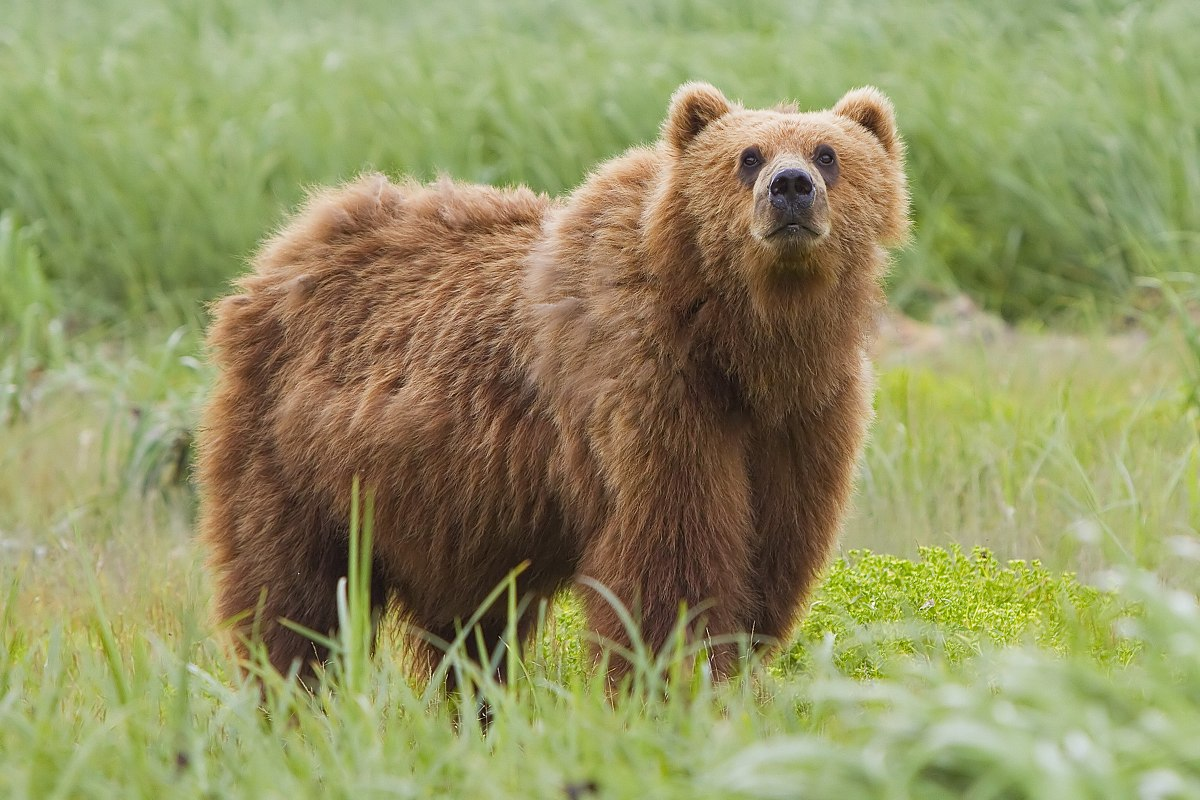

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Deep learning LAB/LAB8

/content/drive/MyDrive/Deep learning LAB/LAB8


In [ ]:
!unzip 'Lab 8.zip'

Archive:  Lab 8.zip
   creating: images and annotated coordinates/
  inflating: images and annotated coordinates/63.jpg  
  inflating: __MACOSX/images and annotated coordinates/._63.jpg  
  inflating: images and annotated coordinates/189.jpg  
  inflating: __MACOSX/images and annotated coordinates/._189.jpg  
  inflating: images and annotated coordinates/77.jpg  
  inflating: __MACOSX/images and annotated coordinates/._77.jpg  
  inflating: images and annotated coordinates/162.jpg  
  inflating: __MACOSX/images and annotated coordinates/._162.jpg  
  inflating: images and annotated coordinates/176.jpg  
  inflating: __MACOSX/images and annotated coordinates/._176.jpg  
  inflating: images and annotated coordinates/88.jpg  
  inflating: __MACOSX/images and annotated coordinates/._88.jpg  
  inflating: images and annotated coordinates/29.txt  
  inflating: __MACOSX/images and annotated coordinates/._29.txt  
  inflating: images and annotated coordinates/15.txt  
  inflating: __MACOSX/ima

In [ ]:
!pwd

/content/drive/MyDrive/Deep learning LAB/LAB8


In [ ]:
!pwd
%cd /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection

/content/drive/My Drive/Deep learning LAB/LAB8
/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection


## Downloading bear detection train dataset consisting of .jpg and .txt files from google api open image dataset, which has the coordinates of bounding boxes

In [ ]:
!python3 main.py downloader -y --classes Bear --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bear.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 58916 KB/s, 0 seconds passed
[DOWNLOAD] | File class-descriptions-boxable.csv do

In [ ]:
!python3 main.py downloader -y --classes Bear --type_csv validation --limit 60


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bear.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Automatic download.
...100%, 16 MB, 38469 KB/s, 0 seconds passed
[DOWNLOAD] | File validation-annotations-bbox.csv

In [ ]:
!python3 main.py downloader -y --classes Bear --type_csv test --limit 30


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Bear.
   [ERROR] | Missing the test-annotations-bbox.csv file.
[DOWNLOAD] | Automatic download.
...100%, 49 MB, 34588 KB/s, 1 seconds passed
[DOWNLOAD] | File test-annotations-bbox.csv downloaded 

## Moving the labels files to images located folder

In [ ]:
import glob
import shutil
import os

src_dir = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/train/Bear/Label/"
dst_dir = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/train/Bear/"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.txt")):
    shutil.copy(jpgfile, dst_dir)

In [ ]:
src_dir1 = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/test/Bear/Label"
dst_dir1 = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/test/Bear/"
for jpgfile in glob.iglob(os.path.join(src_dir1, "*.txt")):
    shutil.copy(jpgfile, dst_dir1)

In [ ]:
src_dir2 = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/validation/Bear/Label/"
dst_dir2 = "/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/OID/Dataset/validation/Bear/"
for jpgfile in glob.iglob(os.path.join(src_dir2, "*.txt")):
    shutil.copy(jpgfile, dst_dir2)

In [ ]:
!pwd

/content/drive/My Drive/Deep learning LAB/LAB8/Bear_detection


## YOLO v5 from ultralytics instead of darknet which is the latest model based on pytorch implementation introduced by Glenn Jocher

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

Cloning into 'yolov5'...
remote: Enumerating objects: 10129, done.
remote: Total 10129 (delta 0), reused 0 (delta 0), pack-reused 10129
Receiving objects: 100% (10129/10129), 10.30 MiB | 5.95 MiB/s, done.
Resolving deltas: 100% (7024/7024), done.


In [ ]:
import glob
import shutil
import os
import cv2

In [ ]:
!pip install -U -r yolov5/requirements.txt  # install dependencies

  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.21.12 requires PyYAML<5.5,>=3.10, but you have pyyaml 6.0 which is incompatible.


In [ ]:
!pwd

/content/drive/My Drive/Deep learning LAB/LAB8/Bear_detection


## Creating a Bear.yaml file which has the path to the dataset mentioned

In [ ]:
%cd /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/data
filehandle = open("Bear.yaml", "w+")
filebuffer = ["path: /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/  #directory\n",
              "train: OID/Dataset/train/Bear/  # 200 images\n", 
              "val: OID/Dataset/val/Bear/  # 60 images\n", 
              "test: OID/Dataset/test/Bear/  # 30 images\n",
              "nc: 1\n",
              "names: ['Bear']"]
filehandle.writelines(filebuffer)
filehandle.close()

/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/data


In [ ]:
%cd /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/
!pwd

/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection
/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection


We need to transform the labels/bounding boxes files to the right format. The annotations stored in txt files are the coordinates (XMin, YMin, XMax, YMax). We convert the annotations or coordinates scaled down between 0 and 1 using the convert_annotations.py file

In [ ]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Bear
100% 200/200 [00:06<00:00, 33.14it/s]
Currently in subdirectory: validation
Converting annotations for class:  Bear
100% 22/22 [00:00<00:00, 31.63it/s]
Currently in subdirectory: test
Converting annotations for class:  Bear
100% 30/30 [00:00<00:00, 31.20it/s]


In [ ]:
%cd /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5

/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5


## Training of the model

In [ ]:
!python train.py --img 416 --batch 16 --epochs 10 --data ./data/Bear.yaml --cfg ./models/yolov5n.yaml --weights  '' --name yolov5n_results  --cache --device 0


train: weights=, cfg=./models/yolov5n.yaml, data=./data/Bear.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=yolov5n_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-11-8 torch 1.10.0+cu102 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=

## Testing the model the results are stored in yolov5/runs/detect/

In [ ]:
!pwd
%cd /content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/

/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection
/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5


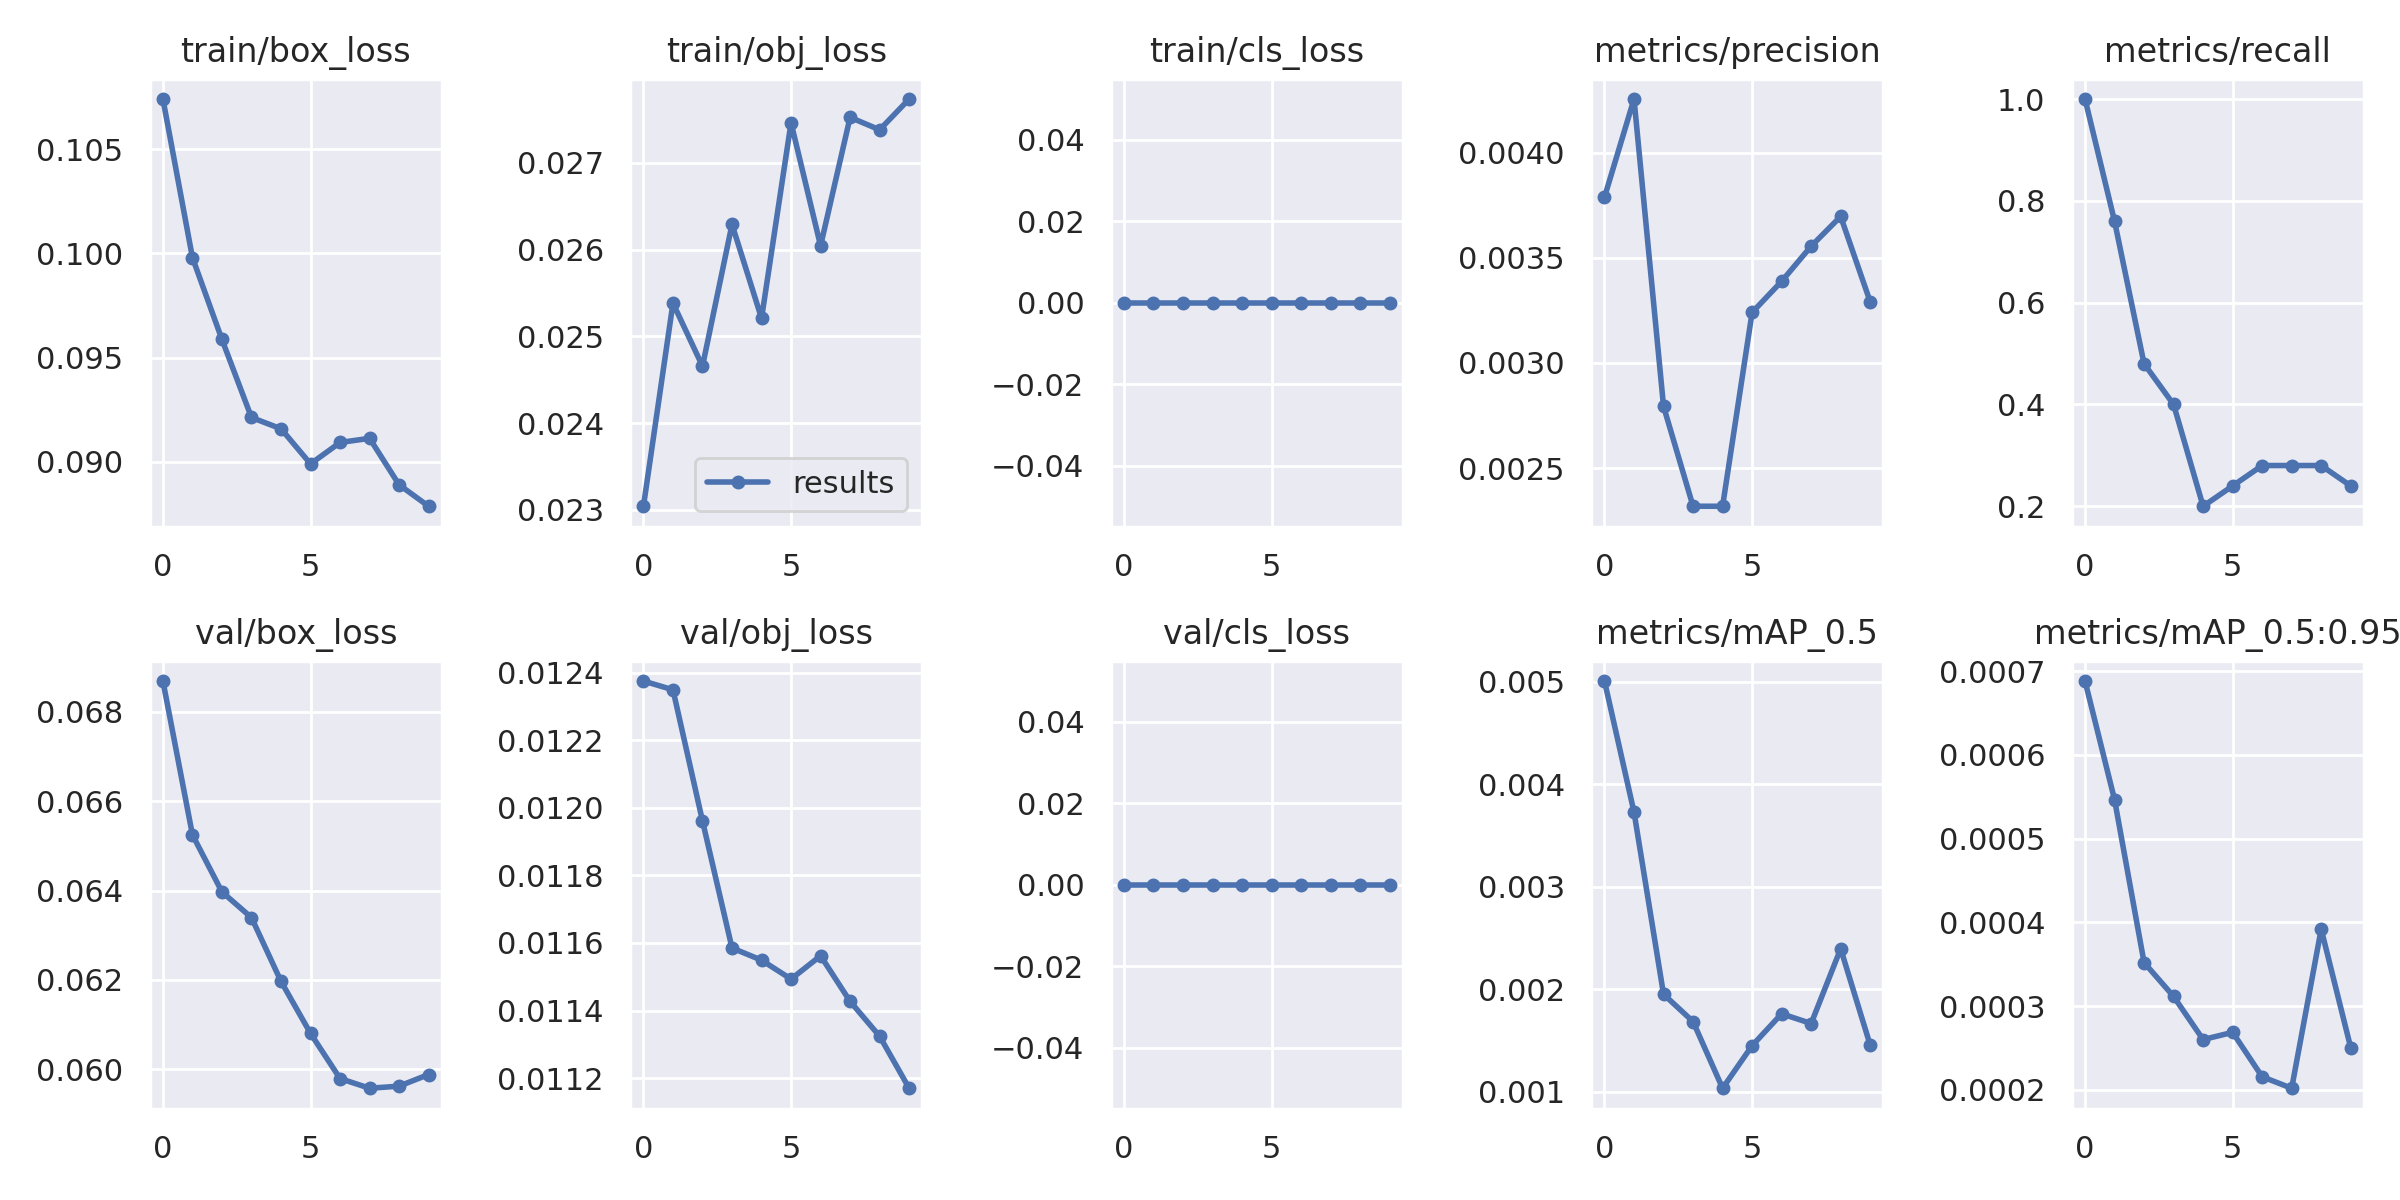

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/runs/train/yolov5n_results/results.png')

## Trained batch result 

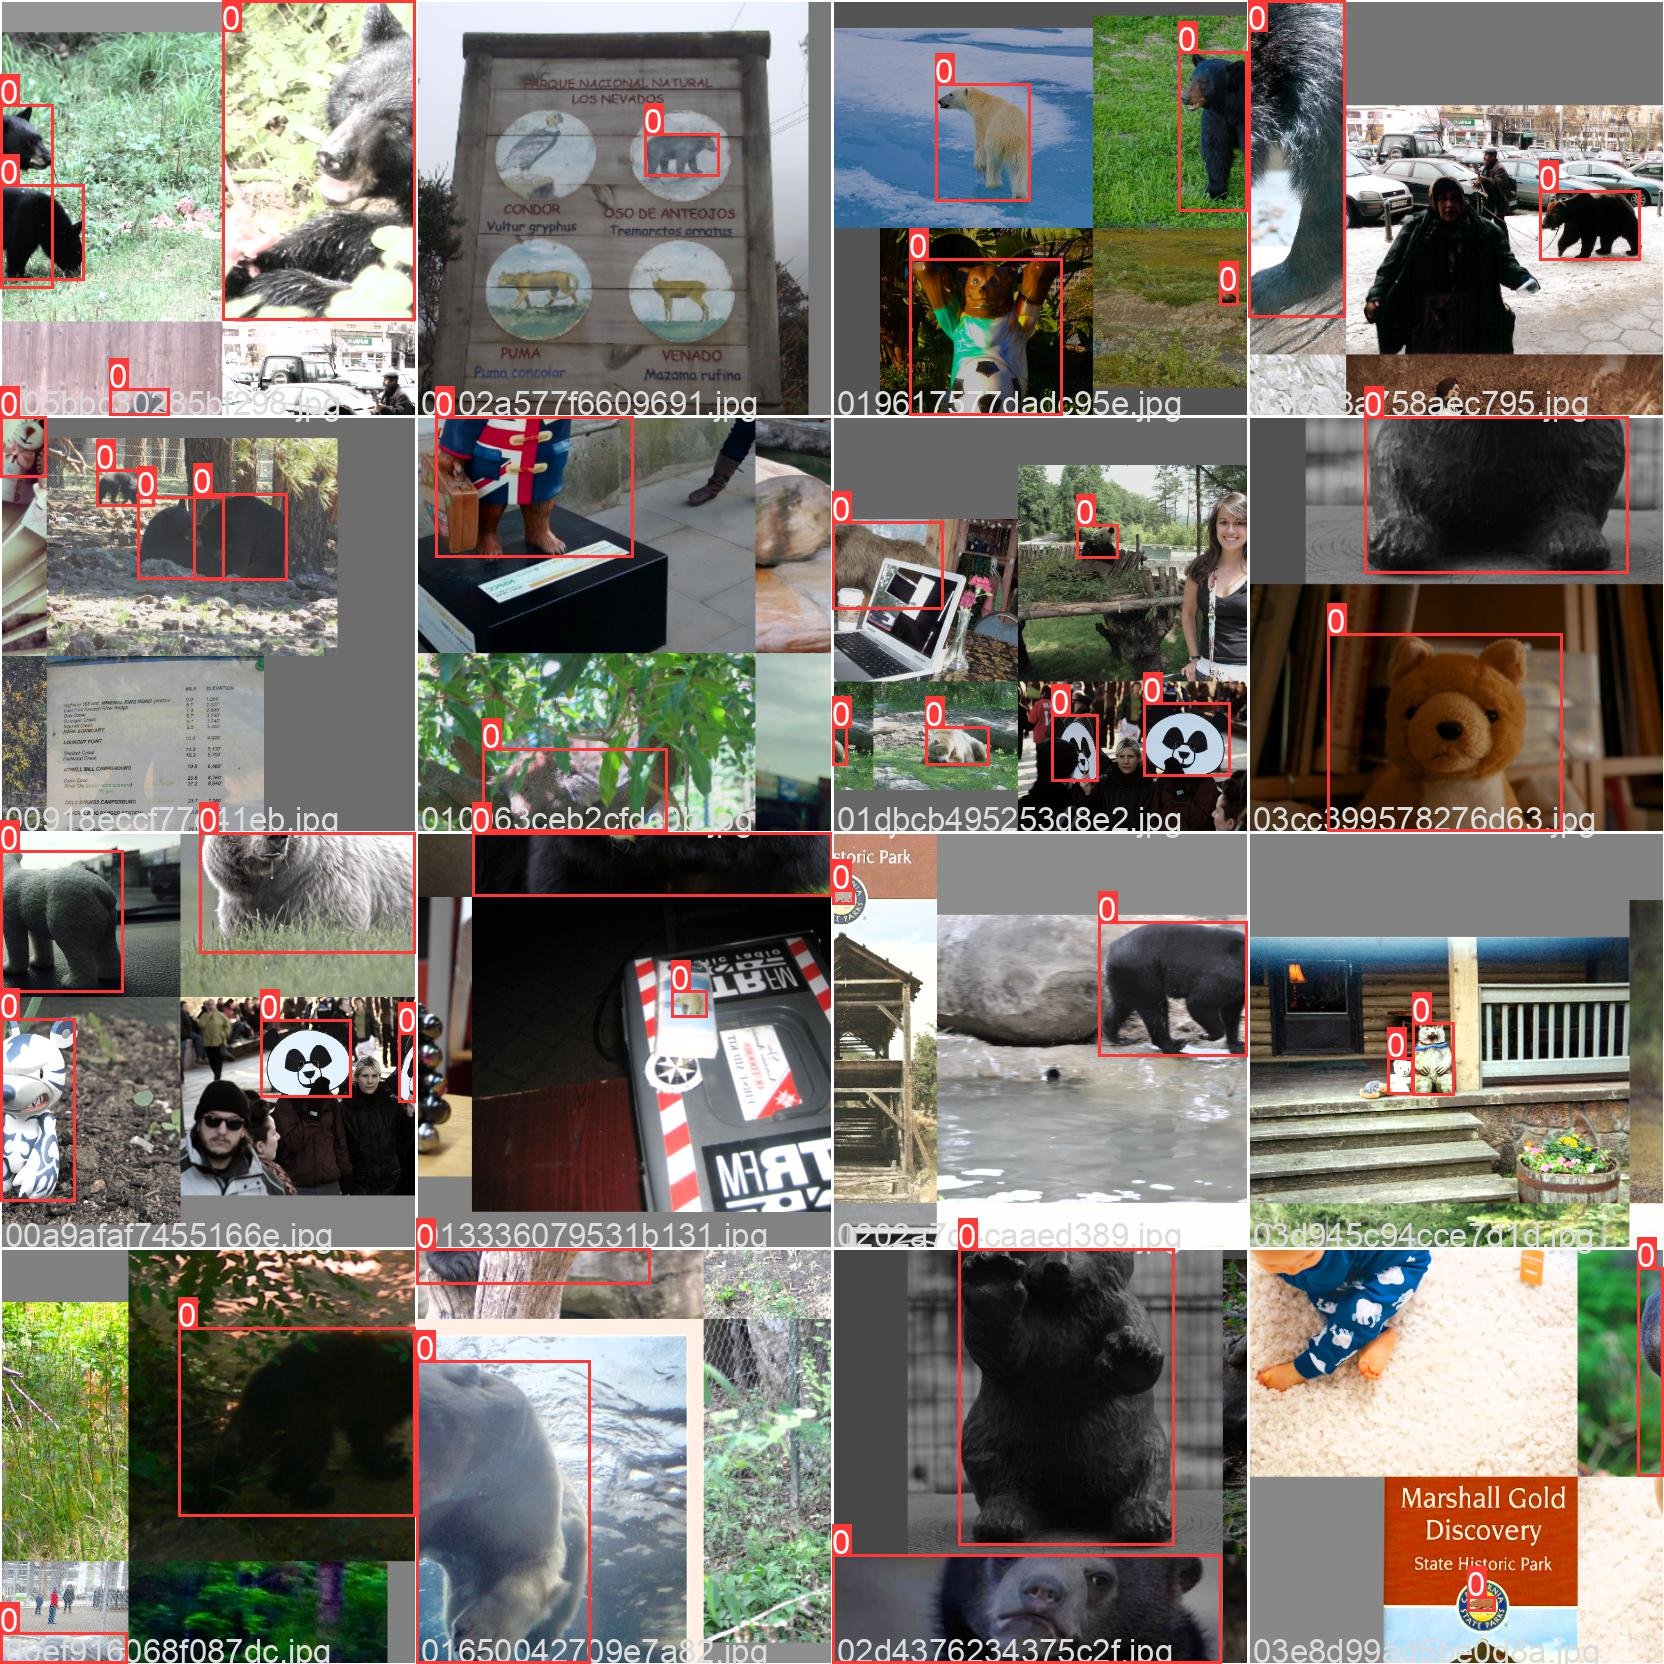

In [ ]:
Image('/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/runs/train/yolov5n_results/train_batch0.jpg')

## Visualizing the results

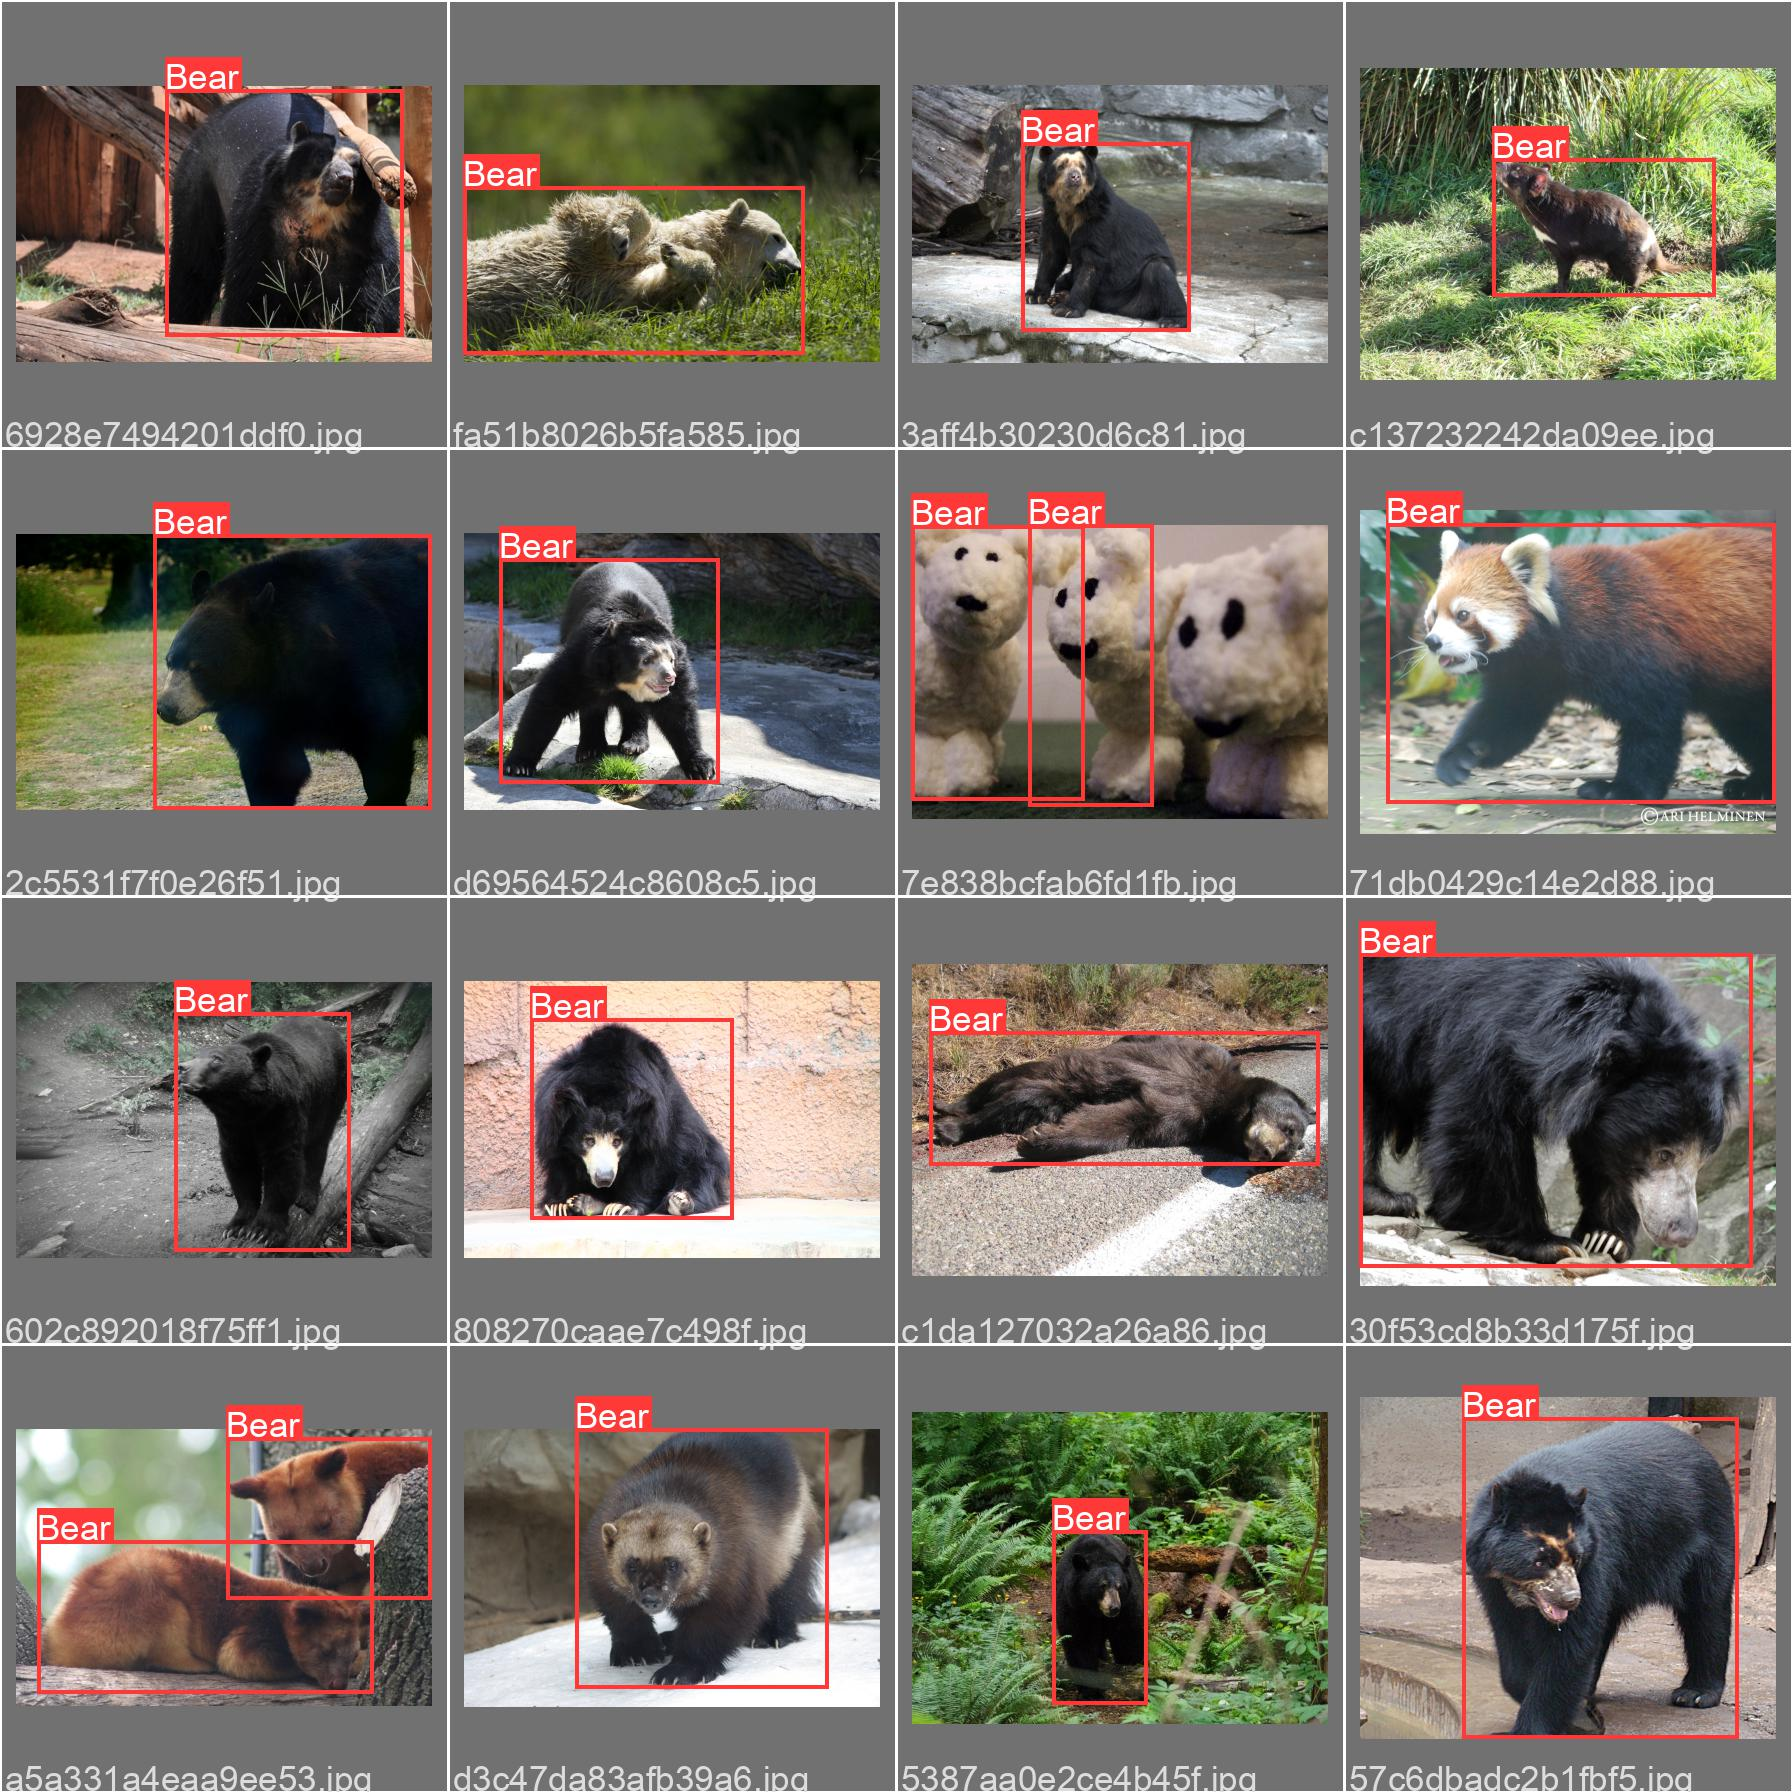

In [ ]:
Image('/content/drive/MyDrive/Deep learning LAB/LAB8/Bear_detection/yolov5/runs/train/yolov5n_results/val_batch0_labels.jpg')
